<a href="https://colab.research.google.com/github/Ftih07/Star-Type-Classification-with-KNN/blob/main/Star_Type_Classification_with_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import File
import pandas as pd
file_path = '/content/6 class csv.csv'
data = pd.read_csv(file_path)

In [ ]:
import pandas as pd  # Import the Pandas library for data manipulation and analysis
import seaborn as sns  # Import the Seaborn library for creating data visualizations such as graphs or charts
import matplotlib.pyplot as plt  # Import Matplotlib to generate graphs or plot data
import numpy as np  # Import Numpy for mathematical operations such as arrays and statistical functions
from scipy.stats import boxcox  # Import the Box-Cox function for data transformation to approximate a normal distribution
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder to convert categorical data into numerical values
from sklearn.model_selection import train_test_split  # Import the function to split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for data standardization
from sklearn.neighbors import KNeighborsClassifier  # Import the K-Nearest Neighbors algorithm for classification
from sklearn.metrics import classification_report  # Import the function to generate a model evaluation report
from sklearn.metrics import confusion_matrix  # Import the function to create a confusion matrix

In [ ]:
data = pd.read_csv('/content/6 class csv.csv') # read file csv
data.tail() # display the last 5 lines of data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
235,38940,374830.0,1356.0,-9.93,5,Blue,O
236,30839,834042.0,1194.0,-10.63,5,Blue,O
237,8829,537493.0,1423.0,-10.73,5,White,A
238,9235,404940.0,1112.0,-11.23,5,White,A
239,37882,294903.0,1783.0,-7.80,5,Blue,O


In [ ]:
data.shape # Display the number of rows and columns

(240, 7)

In [ ]:
data_shorten = data[['Star type', 'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']]
# Create a new DataFrame named 'data_shorten' by selecting only certain columns from DataFrame 'data'

data_shorten

,Star type,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,0,3068,0.002400,0.1700,16.12,Red,M
1,0,3042,0.000500,0.1542,16.60,Red,M
2,0,2600,0.000300,0.1020,18.70,Red,M
3,0,2800,0.000200,0.1600,16.65,Red,M
4,0,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...,...
235,5,38940,374830.000000,1356.0000,-9.93,Blue,O
236,5,30839,834042.000000,1194.0000,-10.63,Blue,O
237,5,8829,537493.000000,1423.0000,-10.73,White,A
238,5,9235,404940.000000,1112.0000,-11.23,White,A


array([[<Axes: title={'center': 'Temperature (K)'}>,
        <Axes: title={'center': 'Luminosity(L/Lo)'}>],
       [<Axes: title={'center': 'Radius(R/Ro)'}>,
        <Axes: title={'center': 'Absolute magnitude(Mv)'}>],
       [<Axes: title={'center': 'Star type'}>, <Axes: >]], dtype=object)

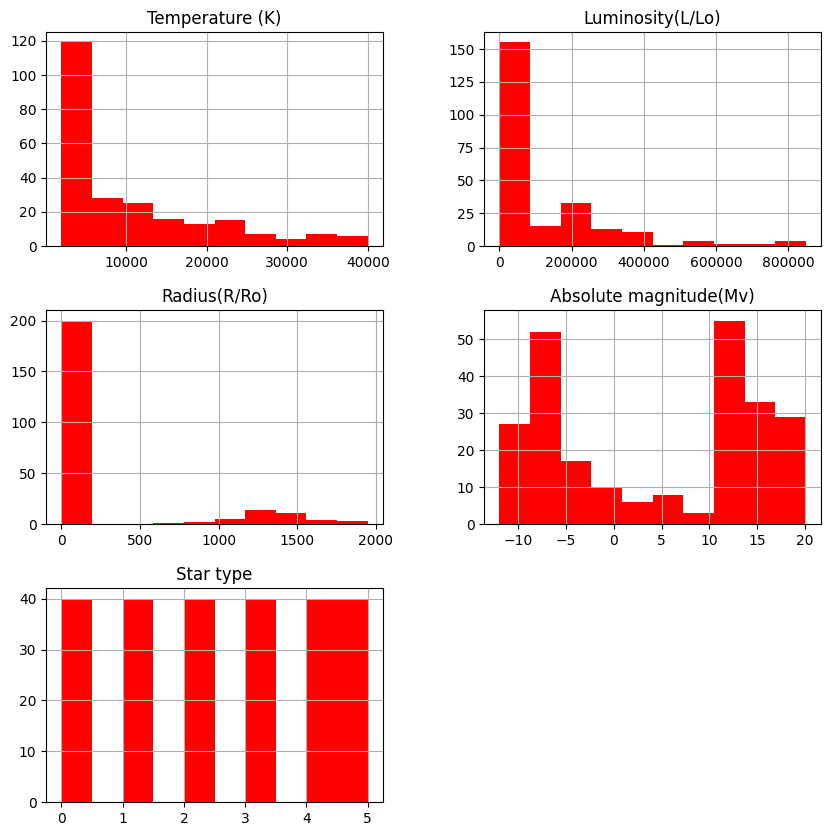

In [ ]:
data.hist(figsize=(10,10), color='red')
# Create a histogram for all numeric columns in the DataFrame 'data' with a graph size of 10x10 and a graph color of red

In [ ]:
def boxplot(data):
    # Defines a function named 'boxplot' to create boxplots for multiple variables in the DataFrame 'data'

    variables = ['Star type', 'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Spectral Class']

    fig, axes = plt.subplots(2, 3, figsize=(10, 5))
    # Creates a 2x3 grid for subplots with a total size of 10x5 inches

    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    # Adjusts the spacing between plots both vertically and horizontally

    for i, var in enumerate(variables):
        row, col = i // 3, i % 3

        sns.boxplot(y=var, data=data, color='green', ax=axes[row, col])
        # Creates a boxplot for the variable 'var' in a specific subplot with the color green

        axes[row, col].set_title(var)
        # Sets the title for each subplot with the variable name

    plt.show()

Text(0.5, 1.0, 'Target Distribution')

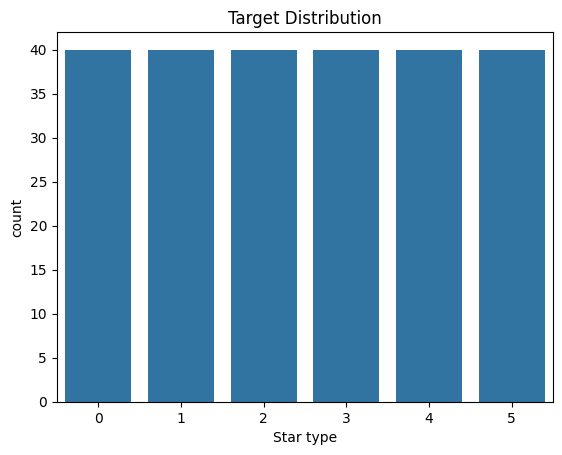

In [ ]:
# Creating count plot for variabel 'Star type' from DataFrame 'data_shorten'
sns.countplot(x='Star type', data=data_shorten)
plt.title('Target Distribution')

In [ ]:
# to clean the data from outliers that can affect the data.
def remove_outlier(data):
  columns = data.select_dtypes(include=['int', 'float']).columns
  cleaned_data = data.copy()
  for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    cleaned_data = cleaned_data[(cleaned_data[column]>=lower_bound)&(cleaned_data[column]<=upper_bound)]

  return cleaned_data

data_shorten = remove_outlier(data_shorten)

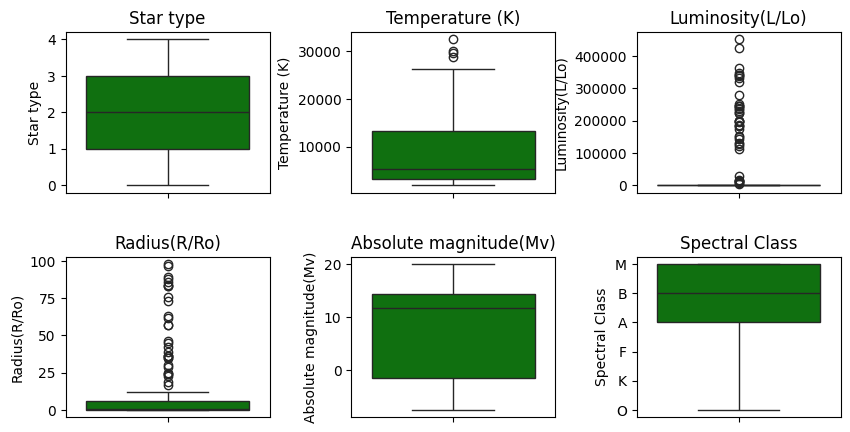

In [ ]:
# to create a boxplot from within data_shorten
boxplot(data_shorten)

In [ ]:
data = data.dropna()

In [ ]:
# remove duplicate data
data.drop_duplicates(inplace= True)

In [ ]:
# displays unique data
data.nunique()

,0
Temperature (K),228
Luminosity(L/Lo),208
Radius(R/Ro),216
Absolute magnitude(Mv),228
Star type,6
Star color,19
Spectral Class,7


In [ ]:
# make display basic information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [ ]:
# to display summary statistics of numeric columns in a data DataFrame
data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [ ]:
# see if there are missing values
data_shorten.isna().sum()

,0
Star type,0
Temperature (K),0
Luminosity(L/Lo),0
Radius(R/Ro),0
Absolute magnitude(Mv),0
Star color,0
Spectral Class,0


In [ ]:
# remove missing value data (this data does not exist so it is mandatory)
data.dropna()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [ ]:
# see if there is duplicate data?
data.duplicated().sum()

0

In [ ]:
# see the column name in the data
data.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

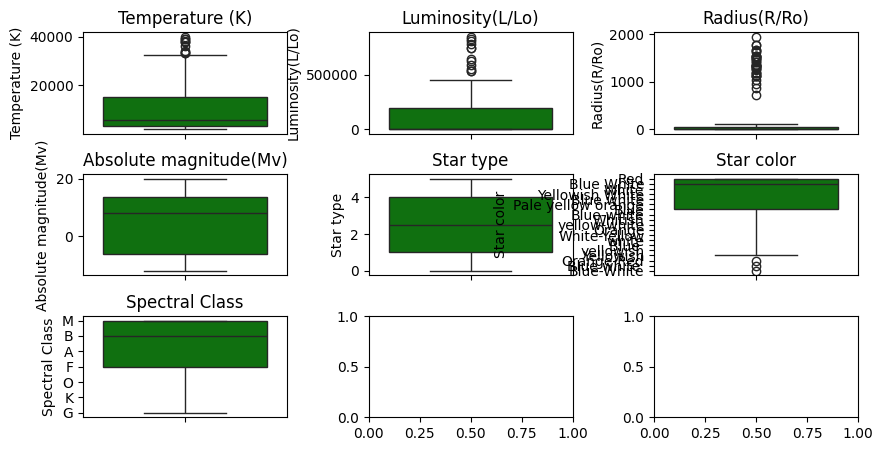

In [ ]:
# check outlier data

def boxplot(data):
  variables = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class']

  fig, axes = plt.subplots(3, 3, figsize=(10, 5))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)

  for i, var in enumerate(variables):
    row, col = i // 3, i%3
    sns.boxplot(y=var, data=data, color='green', ax=axes[row, col])
    axes[row, col].set_title(var)

  plt.show()

boxplot(data)

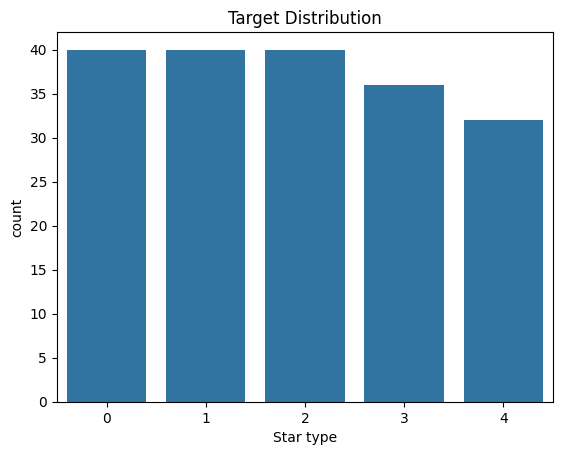

In [ ]:
# Create a countplot to display the distribution of the number of each type of star in the data
sns.countplot(x='Star type', data=data_shorten,)
plt.title('Target Distribution');

In [ ]:
# coding process

le = LabelEncoder()

data['Luminosity(L/Lo)'] = le.fit_transform(data['Luminosity(L/Lo)'])
data['Radius(R/Ro)'] = le.fit_transform(data['Radius(R/Ro)'])
data['Absolute magnitude(Mv)'] = le.fit_transform(data['Absolute magnitude(Mv)'])
data['Star color'] = le.fit_transform(data['Star color'])
data['Spectral Class'] = le.fit_transform(data['Spectral Class'])

In [ ]:
# make display basic information about dataframe after encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Temperature (K)         240 non-null    int64
 1   Luminosity(L/Lo)        240 non-null    int64
 2   Radius(R/Ro)            240 non-null    int64
 3   Absolute magnitude(Mv)  240 non-null    int64
 4   Star type               240 non-null    int64
 5   Star color              240 non-null    int64
 6   Spectral Class          240 non-null    int64
dtypes: int64(7)
memory usage: 13.3 KB


Text(0.5, 1.0, 'Target Distribution')

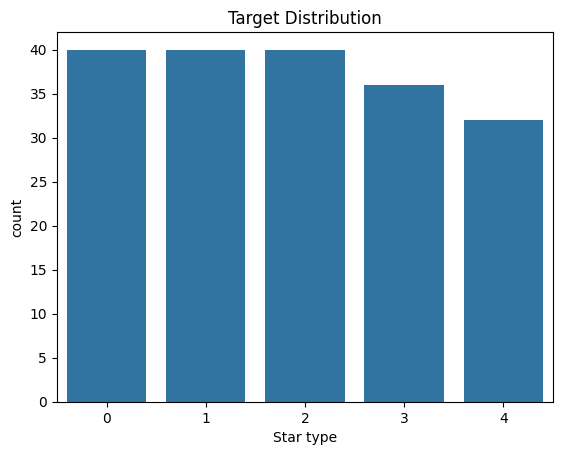

In [ ]:
# Create a countplot to display the distribution of the number of each type of star in the data
sns.countplot(x='Star type', data=data_shorten)
plt.title('Target Distribution')

In [ ]:
# separating features (independent variables) from targets (dependent variables)
X = data.drop(columns='Star type')
y = data['Star type']

In [ ]:
# feature standardization (scaling the feature data)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# splitting data by dividing 80% train data and 20% testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0, 0.5, 'Error Rate')

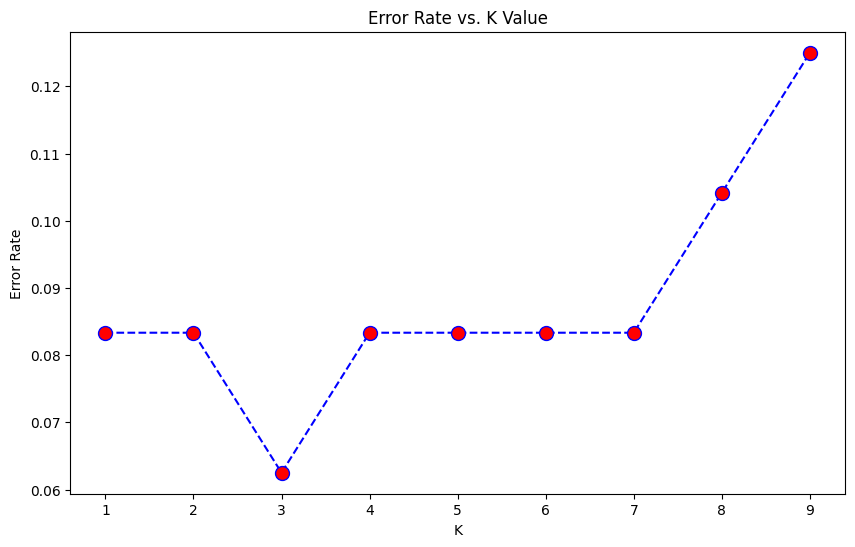

In [ ]:
# determine the best value for parameter K (number of neighbors)
error_rate = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color="blue", linestyle="dashed", marker="o",
         markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [ ]:
# modeling process
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
# model evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         6
           3       0.88      0.88      0.88         8
           4       0.88      0.88      0.88         8
           5       1.00      0.91      0.95        11

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.94      0.94      0.94        48



<Axes: >

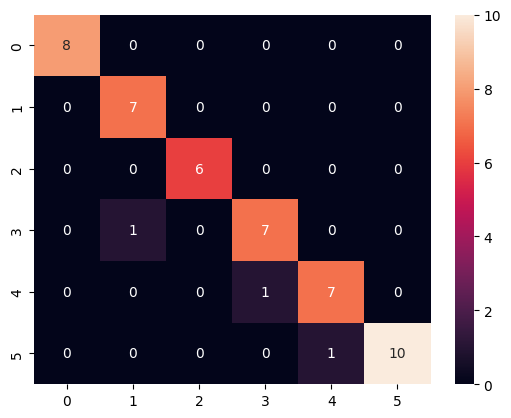

In [ ]:
# for calculating matrices and creating heatmaps for clearer visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

<Axes: xlabel='Star type', ylabel='count'>

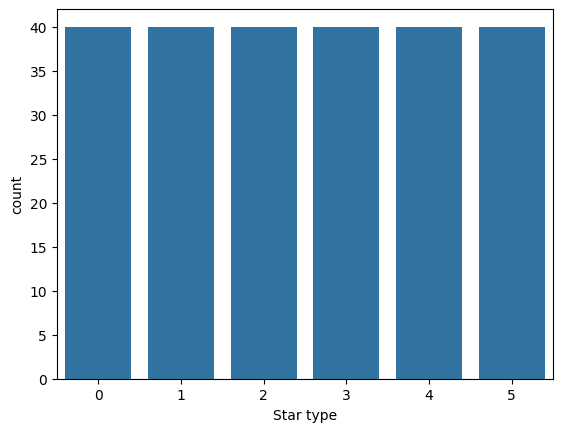

In [ ]:
#oversampling
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_sm, y_sm = sm.fit_resample(X, y)

sns.countplot(x=y_sm)

In [ ]:
# see the value of the oversampling results above
y_sm.value_counts()

,count
Star type,
0,40
1,40
2,40
3,40
4,40
5,40


In [ ]:
# splitting data by dividing 80% train data and 20% testing data
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)

In [ ]:
# process modeling
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_sm, y_train_sm)
y_pred_sm = knn.predict(x_test_sm)
print(classification_report(y_test_sm, y_pred_sm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         6
           3       0.88      0.88      0.88         8
           4       0.88      0.88      0.88         8
           5       1.00      0.91      0.95        11

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.94      0.94      0.94        48



<Axes: >

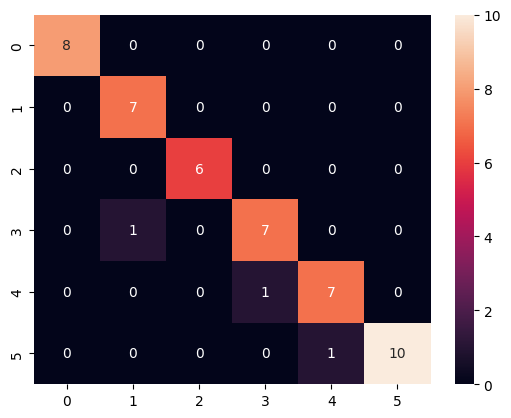

In [ ]:
# for calculating matrices and creating heatmaps for clearer visualization
cm = confusion_matrix(y_test_sm, y_pred_sm)
sns.heatmap(cm, annot=True, fmt='d')

<Axes: xlabel='Star type', ylabel='count'>

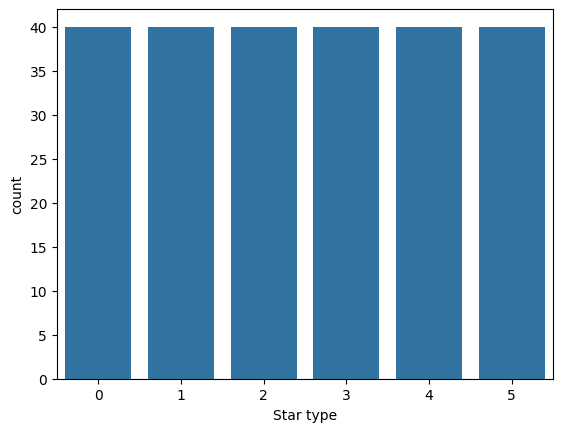

In [ ]:
#Undersampling
from imblearn.under_sampling import NearMiss

nr = NearMiss()
x_nr, y_nr = nr.fit_resample(X, y)

sns.countplot(x=y_nr)

In [ ]:
# to count the number of occurrences of each unique value in variable y_nr
y_nr.value_counts()

,count
Star type,
0,40
1,40
2,40
3,40
4,40
5,40


In [ ]:
# splitting data by dividing 80% train data and 20% testing data
x_train_nr, x_test_nr, y_train_nr, y_test_nr = train_test_split(x_nr, y_nr, test_size=0.2, random_state=42)

In [ ]:
# process modeling
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_nr, y_train_nr)
y_pred_nr = knn.predict(x_test_nr)
print(classification_report(y_test_nr, y_pred_nr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         8
           3       0.88      1.00      0.93         7
           4       1.00      1.00      1.00         8
           5       1.00      0.89      0.94         9

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



<Axes: >

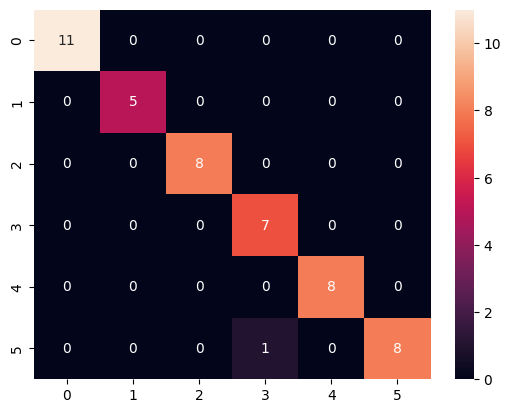

In [ ]:
# for calculating matrices
cm = confusion_matrix(y_test_nr, y_pred_nr)

# create heatmaps for clearer visualization
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
# to train the model and make predictions using 'DecisionTreeClassifier'
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(x_train, y_train)
y_pred_dt_gini = dt.predict(x_test)
print(classification_report(y_test, y_pred_dt_gini))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         6
           3       1.00      0.88      0.93         8
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        11

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



In [ ]:
# to train the model and make predictions
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

dt.fit(x_train, y_train)

y_pred_dt_entropy = dt.predict(x_test)

print(classification_report(y_test, y_pred_dt_entropy))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         6
           3       1.00      0.88      0.93         8
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        11

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48

